In [1]:
## Importing Important Librabries
import numpy as np
import pandas as pd

In [2]:
import random
import math
import seaborn as sns
import plotly
import matplotlib.pyplot as plt

In [3]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

In [4]:
data=df=pd.read_csv("./datasets.csv")

In [5]:
data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
##Looking at the Summary Statistics ie: Measures of Central Tendancy and Dispersion
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
##Checking for Missing Data
data.isnull().sum().sum()

569

In [9]:
## The data contains 33 columns and 569 columns
data.shape

(569, 33)

In [10]:
## Checking for the Namaes of the columns with their data types.
data.info()
## It is seen that diagnosis is a categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [11]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [12]:
## Dropping or Removing Unnecessary Columns
data.drop(columns=['Unnamed: 32', 'id'],axis=1, inplace=True)

In [13]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

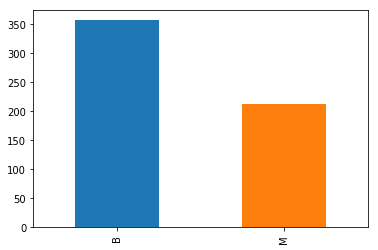

In [14]:
## Understanding the Distribution of the Target variables
data.diagnosis.value_counts().plot(kind="bar")

In [15]:
##Frequency
data.diagnosis.value_counts()
## From the Class Distribution, we can see that we have: 357 Benign Cases and 212 Malignant Cases

B    357
M    212
Name: diagnosis, dtype: int64

## VISUALIZATION OF THE DATA

The use of visualizing our data is to observe which features are the most helpful in predicting benign/malignant cases. 

The other use is to help in model selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16b282e8>,
      dtype=object)

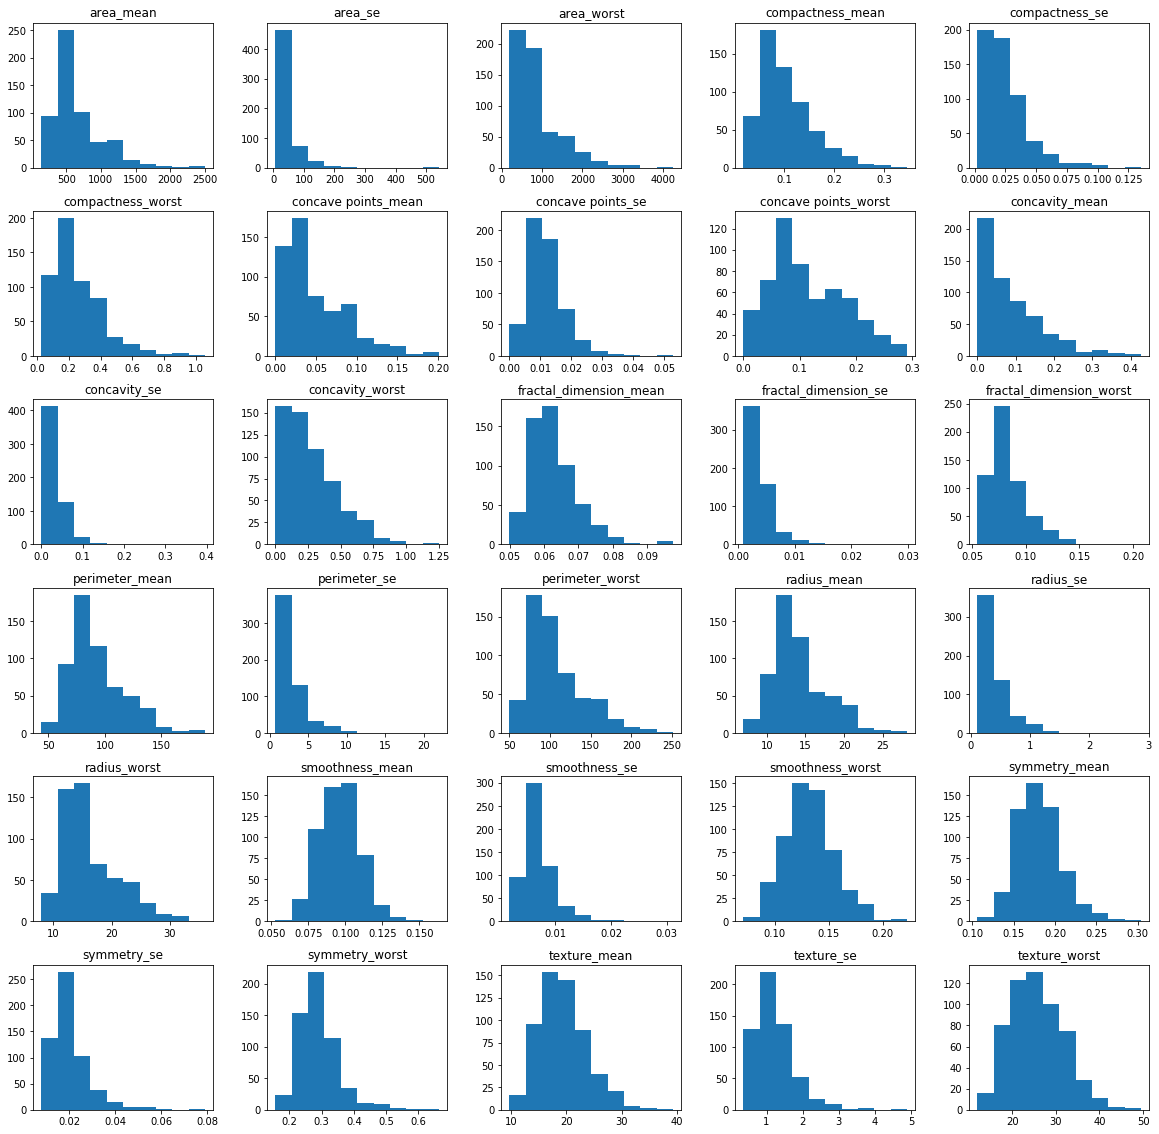

In [16]:
data.hist(bins=10,figsize=(20,20),grid=False)
## Most of the features are normally distributed. 
## We do have perfectly good separtions

## ASSIGNING COLUMNS TO NUMBERS 

In [17]:
cancer_mapping = {"B":1, "M":2}
data.diagnosis = data.diagnosis.map(cancer_mapping)

In [18]:
## Checking for Duplicates in the data set
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
x = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = data['diagnosis']

In [ ]:
## Heat Map
f,ax = plt.subplots(figsize =(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Notes on the Interpretation of the Heat Map.
There are quite a few variables that are correlated. Often we have features that are highly correlated and those provide redundant information. By eliminating highly correlated features we can avoid a predictive bias for the information contained in these features. This also shows us, that when we want to make statements about the biological/ medical importance of specific features, we need to keep in mind that just because they are suitable to predicting an outcome they are not necessarily causal - they could simply be correlated with causal factors.

In [ ]:
high_corr_pts = x[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]

In [ ]:
plt.scatter(data.diagnosis, data.radius_mean, alpha=0.1)
plt.title("Radius_Mean Against Diagnosis")

In [ ]:
plt.scatter(data.diagnosis, data.perimeter_mean, alpha=0.5)
plt.title("Perimeter_Mean Against Diagnosis")

In [ ]:
plt.scatter(data.diagnosis, data.area_mean, alpha=0.1)
plt.title("Area_Mean Against Diagnosis") 

In [ ]:
plt.scatter(data.diagnosis, data.radius_worst, alpha=0.1)
plt.title("Radius_Worst Against Diagnosis")

In [ ]:
plt.scatter(data.diagnosis, data.perimeter_worst, alpha=0.1)
plt.title("Perimeter_Worst Against Diagnosis")

In [ ]:
plt.scatter(data.diagnosis, data.perimeter_worst, alpha=0.5)
plt.title("Perimeter_Worst Against Diagnosis")

In [ ]:
data.shape

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# split data into X and y
X = train[:,0:30].astype(float)
Y = train[:,30]

In [ ]:
## Splitting Data 40% test and 60% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [ ]:
sns.pairplot(high_corr_pts)

In [ ]:
import xgboost as xgb

In [ ]:
model_all = xgb.XGBClassifier()

In [ ]:
## Checking Parameters of the Model
model_all.fit(x_train, y_train)

In [ ]:
pred=model_all.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
print(accuracy_score(y_test, pred))

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
## Finding Optimal Features
from sklearn.feature_selection import RFECV

clf = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=4, scoring='accuracy') ##fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print ('Optimal number of features :', rfecv.n_features_)
print ('Best features :', x_train.columns[rfecv.support_])

## Optimal Features are Selected
We now plot the number of features VS. cross-validation scores to see how it affects the prediction

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of features selected")
plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
plt.show()

In [ ]:
##Interpretation

## Rank the features by their Importance

In [ ]:
## Feature ranking
importances = (model_all.feature_importances_)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" %(f + 1, indices[f], importances[indices[f]]))

In [ ]:
## Plotting Importance Features
plt.title("Feature Importances")

plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", align="center")

plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()
#plt.show()